In [1]:
import numpy as np
import sympy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class BayesClassifier:
    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.classes = y_train.unique()
        self.apriori = {}
        self.mean = {}
        self.cov = {}
        self.inv_cov = {}
        self.det_cov = {}
        
    def fit(self):
        for c in self.classes:
            X_c = self.X_train[self.y_train == c]
            self.apriori[c] = len(X_c) / len(X_train)
            self.mean[c] = np.mean(X_c, axis=0)
            self.cov[c] = covariance(X_c)
            self.inv_cov[c] = np.linalg.inv(self.cov[c])
            self.det_cov[c] = sympy.Matrix(self.cov[c]).det()
            # print(self.det_cov[c])
    
    def predict(self, X_test):
        y_pred = []
        for x in X_test.values:
            probs = [self.calc_prob(x, c) for c in self.classes]
            y_pred.append(self.classes[np.argmax(probs)])
        return y_pred
    
    def calc_prob(self, x, c):
        apriori = self.apriori[c]
        mean = self.mean[c]
        inv_cov = self.inv_cov[c]
        det_cov = self.det_cov[c]
        prob = np.exp(np.dot(-0.5 * (x - mean).T, inv_cov).dot(x - mean)) / np.power((2 * np.pi) ** len(x) * det_cov, 0.5)
        return prob * apriori

In [3]:
def covariance(X):
    X = X - np.mean(X, axis=0)
    return np.dot(X.T, X) / (len(X) - 1)

In [4]:
def split_train_test(df, y_col):
    train_data, test_data = pd.DataFrame(), pd.DataFrame()
    for y in df[y_col].unique():
        df_y = df[df[y_col] == y]
        test_data = pd.concat([test_data, df_y[:5]], ignore_index=True)
        train_data = pd.concat([train_data, df_y[5:]], ignore_index=True)
    X_train, y_train = train_data.drop(y_col, axis=1), train_data[y_col]
    X_test, y_test = test_data.drop(y_col, axis=1), test_data[y_col]
    return X_train, y_train, X_test, y_test

In [5]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

In [6]:
def accuracy_by_class(y_true, y_pred):
    classes = y_true.unique()
    acc_by_class = {}
    for c in classes:
        y_true_c = y_true[y_true == c]
        y_pred_c = y_pred[y_true == c]
        acc_by_class[c] = accuracy(y_true_c, y_pred_c)
    return acc_by_class

In [7]:
face_df = pd.read_csv('face_feature_vectors.csv', index_col=0)
face_df.rename(columns={'Unnamed: 1': 'Class'}, inplace=True)
face_df

,Class,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
1,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
2,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
3,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
4,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
5,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
797,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
798,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
799,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [8]:
X_train, y_train, X_test, y_test = split_train_test(face_df, 'Class')
print(f"X_train: {len(X_train)}")
print(f"X_test: {len(X_test)}")

X_train: 790
X_test: 10


In [9]:
bayes_classifier = BayesClassifier(X_train, y_train)
bayes_classifier.fit()

In [10]:
y_pred = bayes_classifier.predict(X_test)
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result_df

,Actual,Predicted
0,male,male
1,male,male
2,male,male
3,male,male
4,male,male
5,female,male
6,female,female
7,female,female
8,female,female
9,female,female


In [11]:
acc = accuracy(y_test, y_pred)
acc_by_class = accuracy_by_class(y_test, pd.Series(y_pred))
print(f"Accuracy: {acc}")
print(f"Accuracy by class: {acc_by_class}")

Accuracy: 0.9
Accuracy by class: {'male': 1.0, 'female': 0.8}


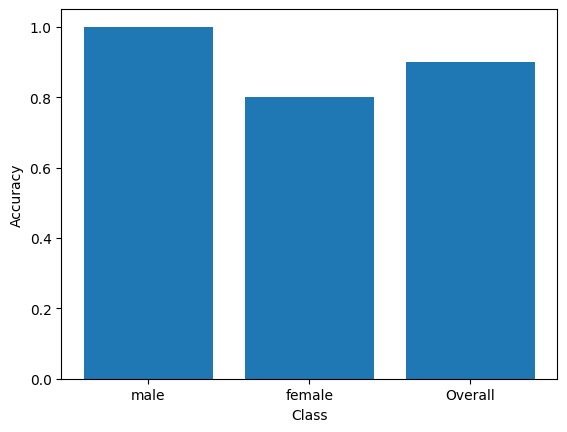

In [12]:
all_acc = {**acc_by_class, 'Overall':acc}
plt.bar(all_acc.keys(), all_acc.values())
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.show()